In [139]:
import pandas as pd

In [140]:
import numpy as np
import matplotlib.pyplot as plt

In [141]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [142]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [143]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [144]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [145]:
train[col].unique()


array([0, 1])

In [146]:
test[col].unique()

array([0, 1])

In [147]:
train.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [148]:
test.isnull().sum()

ID      0
X0      0
X1      0
X2      0
X3      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 377, dtype: int64

**Checking Variance in each column then finding zero variance column to remove it**


In [149]:
train_var_col=train.var()
train_var_col

<ipython-input-149-7806c430ac2b>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_var_col=train.var()


ID      5.941936e+06
y       1.607667e+02
X10     1.313092e-02
X11     0.000000e+00
X12     6.945713e-02
            ...     
X380    8.014579e-03
X382    7.546747e-03
X383    1.660732e-03
X384    4.750593e-04
X385    1.423823e-03
Length: 370, dtype: float64

In [150]:
test_var_col=test.var()
test_var_col

<ipython-input-150-038c5cb14d22>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_var_col=test.var()


ID      5.871311e+06
X10     1.865006e-02
X11     2.375861e-04
X12     6.885074e-02
X13     5.734498e-02
            ...     
X380    8.014579e-03
X382    8.715481e-03
X383    4.750593e-04
X384    7.124196e-04
X385    1.660732e-03
Length: 369, dtype: float64

In [152]:
#finding zero variance column from above result and storing it into new variable called zero_var_variables
zero_var_variables=train_var_col[train_var_col==0].index.tolist()

In [151]:
test_var_variables=test_var_col[test_var_col==0].index.tolist()
test_var_variables

['X257', 'X258', 'X295', 'X296', 'X369']

In [153]:
#These are the variables(festures) which has zero variance 
zero_var_variables

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [155]:
#Removing zero variance column from train dataset and storing it to train dataset with updation
train=train.drop(zero_var_variables,axis=1)

In [154]:
test=test.drop(test_var_variables,axis=1)

In [156]:
#checking the columns weather the column is removed or not by head() function
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [158]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [159]:
#checking the columns weather the column is present or not by again doing variance function on updated dataset
train.var()==0

<ipython-input-159-0ecf6b5669be>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.var()==0


ID      False
y       False
X10     False
X12     False
X13     False
        ...  
X380    False
X382    False
X383    False
X384    False
X385    False
Length: 358, dtype: bool

In [160]:
test.var()==0

<ipython-input-160-caec5634ca91>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.var()==0


ID      False
X10     False
X11     False
X12     False
X13     False
        ...  
X380    False
X382    False
X383    False
X384    False
X385    False
Length: 364, dtype: bool

**Checking categorical values present in columns and convert it into numerical value**

In [119]:
#finding the count of datatypes of each column and checked the categorical datatype which is mentioned as (object) to convert it into numerical value in further process
train.dtypes.value_counts()                      

int64      357
object       8
float64      1
dtype: int64

In [161]:
test.dtypes.value_counts()

int64     364
object      8
dtype: int64

In [162]:
#by select_dtypes function we can find out the any dataype from columns(features) (here, I'm finding categorical)
train_categorical_columns=train.select_dtypes(include=['object']).columns.tolist()        #finding the variables(features) which has categorical values
train_categorical_columns

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [164]:
test_categorical_columns=test.select_dtypes(include=['object']).columns.tolist()
test_categorical_columns

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [166]:
#finding the unique value from each categorical varaibles(features) by for loop
for col in train_categorical_columns:           
  print(col,train[col].unique())

X0 ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
X1 ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
X2 ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
X3 ['a' 'e' 'c' 'f' 'd' 'b' 'g']
X4 ['d' 'b' 'c' 'a']
X5 ['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
X6 ['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
X8 ['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c']


In [167]:
for col in test_categorical_columns:
  print(col,test[col].unique())

X0 ['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb']
X1 ['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab']
X2 ['n' 'ai' 'as' 'ae' 's' 'b' 'e' 'ak' 'm' 'a' 'aq' 'ag' 'r' 'k' 'aj' 'ay'
 'ao' 'an' 'ac' 'af' 'ax' 'h' 'i' 'f' 'ap' 'p' 'au' 't' 'z' 'y' 'aw' 'd'
 'at' 'g' 'am' 'j' 'x' 'ab' 'w' 'q' 'ah' 'ad' 'al' 'av' 'u']
X3 ['f' 'a' 'c' 'e' 'd' 'g' 'b']
X4 ['d' 'b' 'a' 'c']
X5 ['t' 'b' 'a' 'z' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac'
 'ad' 'ae' 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
X6 ['a' 'g' 'j' 'l' 'i' 'd' 'f' 'h' 'c' 'k' 'e' 'b']
X8 ['w' 'y' 'j' 'n' 'm' 's' 'a' 'v' 'r' 'o' 't' 'h' 'c' 'k' 'p' 'u' 'd' 'g'
 'b' 'q' 'e' 'l' 'f' 'i' 'x']


In [168]:
#Using LabelEncoder to convert the categorical value into numerical value
from sklearn.preprocessing import LabelEncoder

In [169]:
my_label_encoder=LabelEncoder()

In [173]:
#fitting model on train dataset by for loop  
for col in train:
  train[col]=my_label_encoder.fit_transform(train[col])

In [175]:
for col in test:
  test[col]=my_label_encoder.fit_transform(test[col])

In [174]:
#again checking categorical value after label encoding just for confirmation
train.select_dtypes(include=['object']).columns.tolist()          

[]

In [176]:
test.select_dtypes(include=['object']).columns.tolist()

[]

In [126]:
##another method to checking categorical value that object datatype is present in any column or not with count
train.dtypes.value_counts()

int64    366
dtype: int64

In [177]:
test.dtypes.value_counts()

int64    372
dtype: int64

In [178]:
#Both Train and Test dataset converted into numerical value now 
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,2466,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,1,366,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,2,69,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,3,133,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,4,106,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0


In [179]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,1,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,2,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,3,21,13,34,5,3,31,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,4,45,20,17,2,3,30,8,12,0,...,1,0,0,0,0,0,0,0,0,0


**Before applying PCA, preprocess the data by scaling it to ensure that all features are on the same scale. 
Using the StandardScaler class from the scikit-learn library for this purpose.** 

In [185]:
from sklearn.preprocessing import StandardScaler

In [186]:
scaler=StandardScaler()

In [187]:
train_scaled=scaler.fit_transform(train)

In [188]:
test_scaled=scaler.fit_transform(test)

#Performing Dimensionality Reduction by PCA



PCA is a widely used method for dimensionality reduction. It is a linear transformation technique that can be used to reduce the number of features in a dataset while preserving most of its information.

In [189]:
from sklearn.decomposition import PCA

In [190]:
pca1=PCA(n_components=2)

In [192]:
pca2=PCA(n_components=2)

In [191]:
train_pca=pca1.fit_transform(train_scaled)

In [193]:
test_pca=pca2.fit_transform(test_scaled)

**Extract the explained variance ratio for each principal component using the explained_variance_ratio_ attribute of the PCA object.**

In [197]:
# checking weather PCA is done or not successfully
explained_var_ratio1= pca1.explained_variance_ratio_
explained_var_ratio1


array([0.06865333, 0.05689497])

In [198]:
explained_var_ratio2= pca2.explained_variance_ratio_
explained_var_ratio2

array([0.06895084, 0.05442998])

**Visualize the explained variance ratio using a bar chart or a line chart to compare the ratios for the different datasets.**

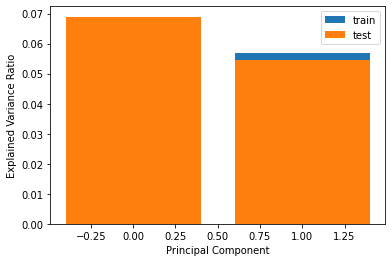

In [199]:
# Visualize the explained variance ratio
plt.bar(range(len(explained_var_ratio1)), explained_var_ratio1, label='train')
plt.bar(range(len(explained_var_ratio2)), explained_var_ratio2, label='test')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.show()


In [228]:
y=train[['y']]
x=train.drop(train[['y','ID']],axis=1)

In [215]:
y

,y
0,2466
1,366
2,69
3,133
4,106
...,...
4204,1657
4205,1766
4206,1801
4207,280


In [213]:
x

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,31,16,40,3,3,0,7,7,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,8,23,38,0,3,0,6,4,0,1,...,0,0,1,0,0,0,0,0,0,0
4207,9,19,25,5,3,0,11,20,0,0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
from sklearn.model_selection import train_test_split

In [220]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [224]:
import xgboost as xgb

In [234]:
train_data=xgb.DMatrix(x_train,label=y_train)
test_data=xgb.DMatrix(x_test,label=y_test)

In [237]:
# Define your model parameters
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'reg:linear',
}

In [238]:
# Training XGBoost model
model = xgb.train(params,train_data)

[22:04:54] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [239]:
# Make predictions on the test set
y_pred = model.predict(test_data)

In [241]:
from sklearn.metrics import accuracy_score

In [242]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred.round())
print('Accuracy:', accuracy)

Accuracy: 0.001583531274742676
